In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rnd = np.random
rnd.seed(1)
n = 50
xc = rnd.rand(n+1)*20
yc = rnd.rand(n+1)*10

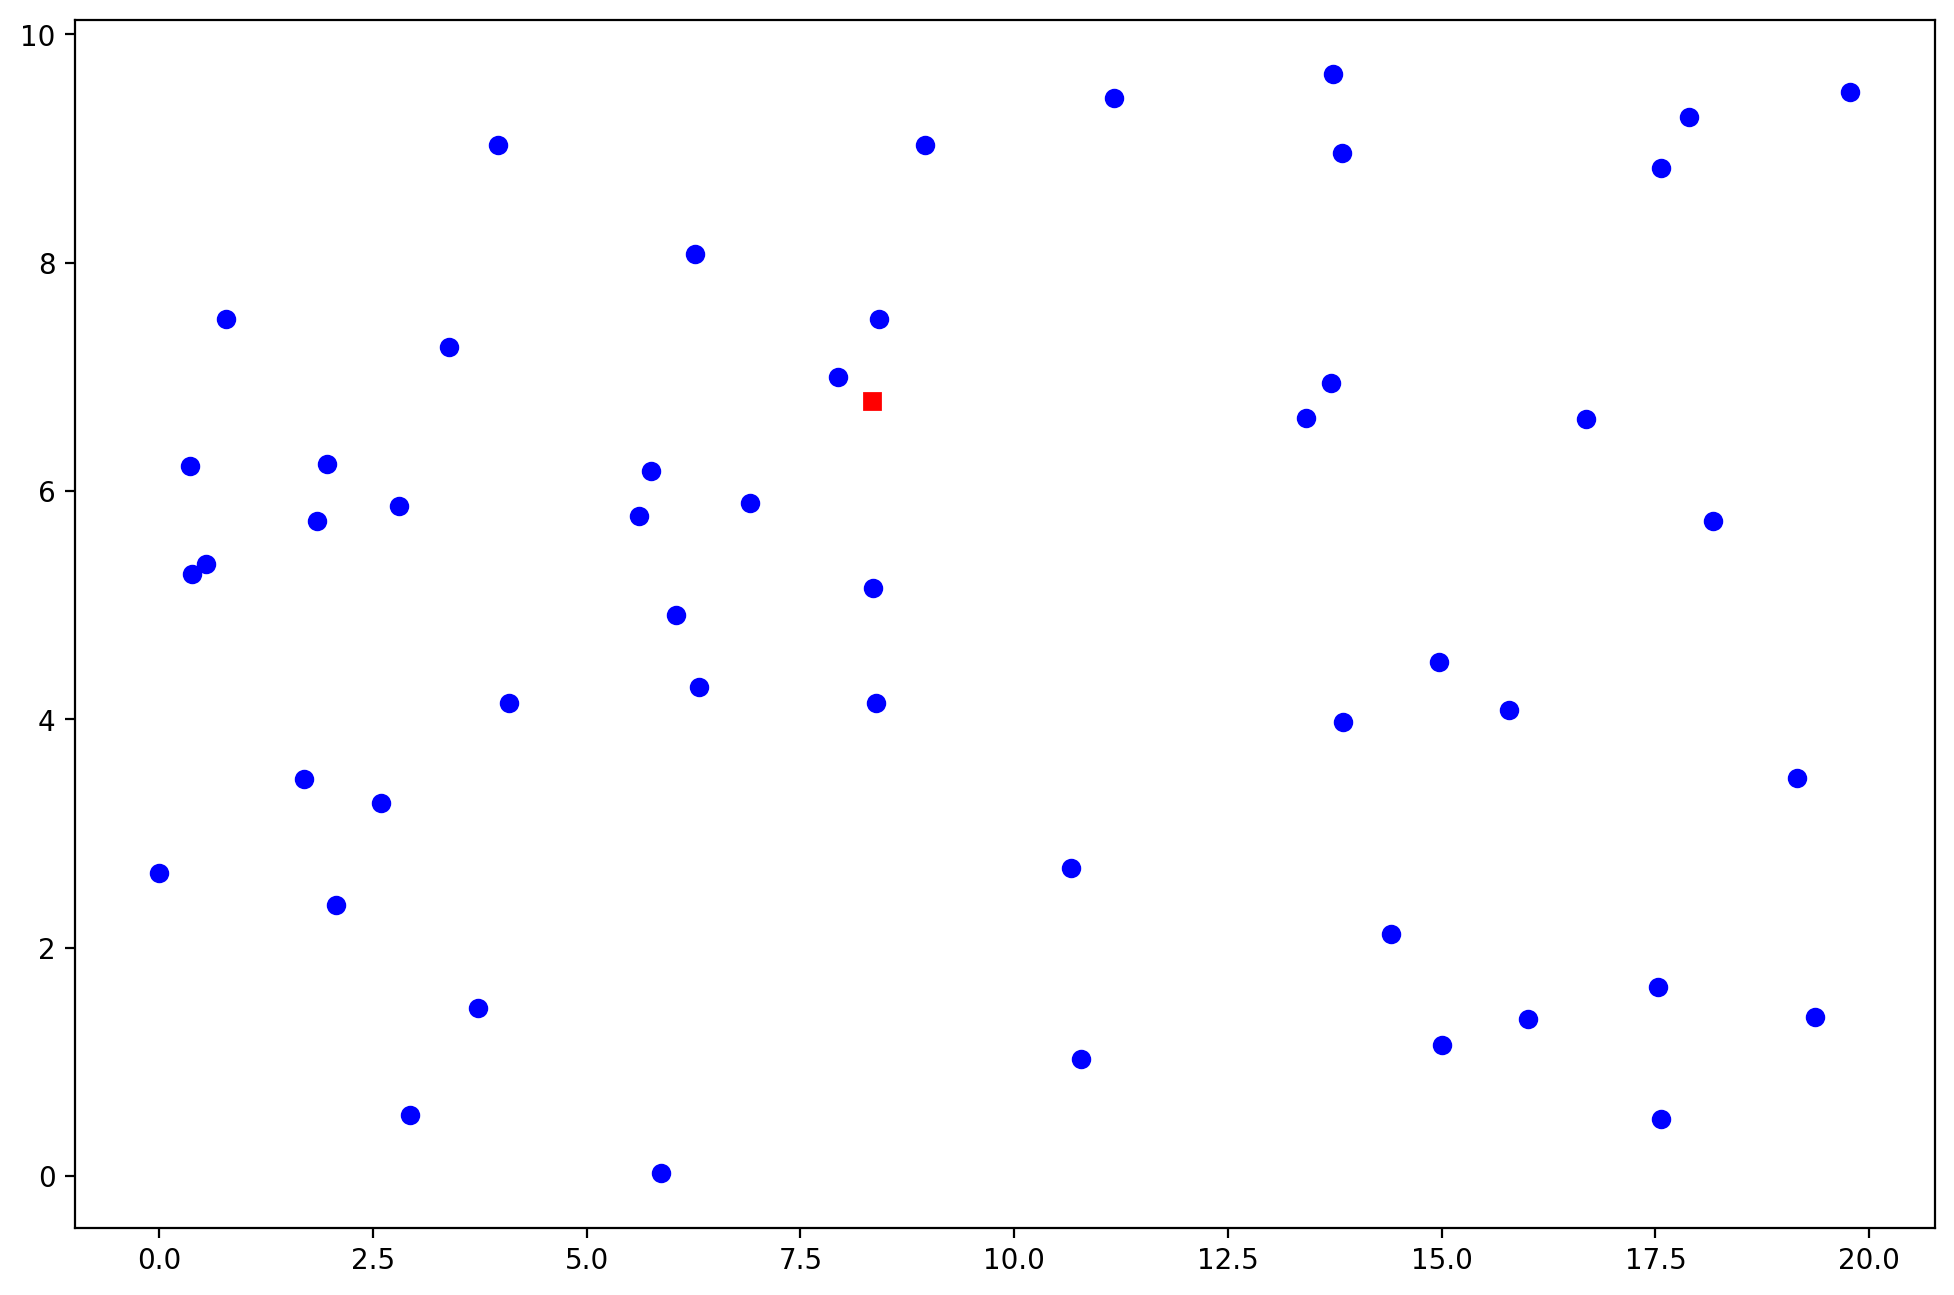

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200
plt.plot(xc[0], yc[0],c='r',marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

In [4]:
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i,j) for i in V for j in V if i!=j]
Distancia = {(i,j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i,j in A}
K = 50
k = {i: rnd.randint(1,10) for i in N}
routes = [[0,i,0,k[i]] for i in range(n+1)   if i>0]

In [5]:
Distancia

{(0, 1): 7.6567118866135475,
 (0, 2): 9.306210724247038,
 (0, 3): 2.9611122893845176,
 (0, 4): 8.26674995239961,
 (0, 5): 6.577561182337092,
 (0, 6): 7.0437336393590595,
 (0, 7): 1.6864897571358815,
 (0, 8): 0.4559329678376283,
 (0, 9): 6.258508986845302,
 (0, 10): 2.6481519349864326,
 (0, 11): 5.366207639770542,
 (0, 12): 5.007859230025791,
 (0, 13): 11.162117413314958,
 (0, 14): 7.922698356928558,
 (0, 15): 5.0711411465961085,
 (0, 16): 1.6394739649642884,
 (0, 17): 3.884675710701501,
 (0, 18): 5.609131202650112,
 (0, 19): 4.920719751358891,
 (0, 20): 9.391717475308171,
 (0, 21): 12.274299872012115,
 (0, 22): 2.4383728385853964,
 (0, 23): 6.182328994039351,
 (0, 24): 10.524902790007859,
 (0, 25): 9.870089714994691,
 (0, 26): 7.419192338614002,
 (0, 27): 7.593533490275088,
 (0, 28): 4.966276431790088,
 (0, 29): 9.44635732217415,
 (0, 30): 6.397331089114402,
 (0, 31): 0.7256841156769823,
 (0, 32): 11.3093292034346,
 (0, 33): 4.702791779561442,
 (0, 34): 5.910095805389912,
 (0, 35): 3.2

In [6]:
k

{1: 6,
 2: 2,
 3: 3,
 4: 2,
 5: 6,
 6: 5,
 7: 1,
 8: 8,
 9: 9,
 10: 6,
 11: 8,
 12: 1,
 13: 4,
 14: 2,
 15: 5,
 16: 5,
 17: 7,
 18: 9,
 19: 9,
 20: 3,
 21: 8,
 22: 6,
 23: 6,
 24: 5,
 25: 6,
 26: 9,
 27: 6,
 28: 9,
 29: 2,
 30: 2,
 31: 9,
 32: 8,
 33: 1,
 34: 4,
 35: 5,
 36: 3,
 37: 1,
 38: 4,
 39: 6,
 40: 2,
 41: 3,
 42: 5,
 43: 4,
 44: 1,
 45: 7,
 46: 1,
 47: 8,
 48: 3,
 49: 9,
 50: 4}

In [7]:
routes

[[0, 1, 0, 6],
 [0, 2, 0, 2],
 [0, 3, 0, 3],
 [0, 4, 0, 2],
 [0, 5, 0, 6],
 [0, 6, 0, 5],
 [0, 7, 0, 1],
 [0, 8, 0, 8],
 [0, 9, 0, 9],
 [0, 10, 0, 6],
 [0, 11, 0, 8],
 [0, 12, 0, 1],
 [0, 13, 0, 4],
 [0, 14, 0, 2],
 [0, 15, 0, 5],
 [0, 16, 0, 5],
 [0, 17, 0, 7],
 [0, 18, 0, 9],
 [0, 19, 0, 9],
 [0, 20, 0, 3],
 [0, 21, 0, 8],
 [0, 22, 0, 6],
 [0, 23, 0, 6],
 [0, 24, 0, 5],
 [0, 25, 0, 6],
 [0, 26, 0, 9],
 [0, 27, 0, 6],
 [0, 28, 0, 9],
 [0, 29, 0, 2],
 [0, 30, 0, 2],
 [0, 31, 0, 9],
 [0, 32, 0, 8],
 [0, 33, 0, 1],
 [0, 34, 0, 4],
 [0, 35, 0, 5],
 [0, 36, 0, 3],
 [0, 37, 0, 1],
 [0, 38, 0, 4],
 [0, 39, 0, 6],
 [0, 40, 0, 2],
 [0, 41, 0, 3],
 [0, 42, 0, 5],
 [0, 43, 0, 4],
 [0, 44, 0, 1],
 [0, 45, 0, 7],
 [0, 46, 0, 1],
 [0, 47, 0, 8],
 [0, 48, 0, 3],
 [0, 49, 0, 9],
 [0, 50, 0, 4]]

In [8]:
def cw_savings():
    savings = [(Distancia[i,0]+Distancia[0,j]-Distancia[i,j], i, j) for i,j in Distancia if i!=j and i>0 and j>0 and i>j]
    savings.sort(reverse=True)
    return savings

In [9]:
def find_node(node, routes):
    for i in range(len(routes)):
        if node in routes[i] and routes[i].index(node) != (len(routes[i])-1):
            return i, routes[i].index(node)

In [10]:
def test_merge(idr1, idn1 ,idr2, idn2, routes):
    if idr1 == idr2:
        return 0
    if routes[idr1][idn1+1] == 0 and routes[idr2][idn2-1] == 0:
        if routes[idr1][-1] + routes[idr2][-1] < K:
            return 1
        else:
            return 0
    if routes[idr1][idn1-1] == 0 and routes[idr2][idn2+1] == 0:
        if routes[idr1][-1] + routes[idr2][-1] < K:
            return 2
        else:
            return 0
    else:
        return 0

In [11]:
def merge(idr1,idr2,routes):
    t1,t2 = routes[idr1], routes[idr2]
    t3 = t1[:-2] + t2[1:-1] + [(t1[-1] + t2[-1])]
    routes.append(t3)
    routes.remove(t1)
    routes.remove(t2)
   # print(routes)

In [12]:
def sequential_savings(savings, routes):
    while len(savings) > 0:
        idr1,idn1 = find_node(savings[0][1], routes)
        idr2,idn2 = find_node(savings[0][2], routes)
        test = test_merge(idr1,idn1,idr2,idn2,routes)
        
        #print("status:" ,test)
        if test == 1:
            merge(idr1,idr2,routes)
        
        if test == 2:
            merge(idr2,idr1,routes)
        savings.pop(0)
    return routes

In [13]:
savings = cw_savings()
savings

[(21.47717000889701, 32, 21),
 (21.42439238995032, 21, 13),
 (20.94334105628622, 24, 21),
 (20.532495269247033, 24, 13),
 (19.724902272617857, 40, 25),
 (19.379487618270087, 32, 24),
 (19.08290134094161, 32, 13),
 (18.887869594686652, 40, 29),
 (18.77602131584871, 20, 13),
 (18.765254301509323, 29, 25),
 (18.742366502884973, 46, 32),
 (18.37825495587944, 24, 20),
 (18.3156287651763, 21, 20),
 (17.656891055061585, 46, 21),
 (17.553616611891037, 46, 40),
 (17.2516308295807, 39, 13),
 (17.08421623863629, 39, 20),
 (17.02423426587567, 40, 32),
 (16.913196228925315, 32, 20),
 (16.679499914059356, 39, 24),
 (16.634776332948647, 39, 21),
 (16.51062361418559, 46, 37),
 (16.278703822866422, 46, 24),
 (16.208301644814377, 46, 25),
 (16.178303119762045, 46, 29),
 (15.914375597829329, 40, 21),
 (15.899294448273707, 40, 37),
 (15.836180920989845, 50, 14),
 (15.807483149378367, 43, 32),
 (15.777050009234394, 46, 13),
 (15.719413944406348, 43, 21),
 (15.666406302532481, 37, 32),
 (15.458655011957475,

In [14]:

sequential_savings(savings,routes)

[[0, 36, 29, 40, 25, 37, 46, 32, 21, 13, 24, 20, 39, 0, 49],
 [0, 33, 9, 1, 43, 41, 23, 15, 11, 34, 0, 46],
 [0, 35, 47, 6, 4, 44, 2, 26, 49, 12, 3, 48, 0, 48],
 [0, 28, 27, 38, 50, 14, 5, 30, 18, 42, 7, 0, 48],
 [0, 16, 10, 0, 11],
 [0, 8, 22, 19, 45, 17, 31, 0, 46]]

In [15]:
auxiliar = [(routes[i][j],routes[i][j+1]) for i in range(len(routes)) for j in range(len(routes[i])-2)]

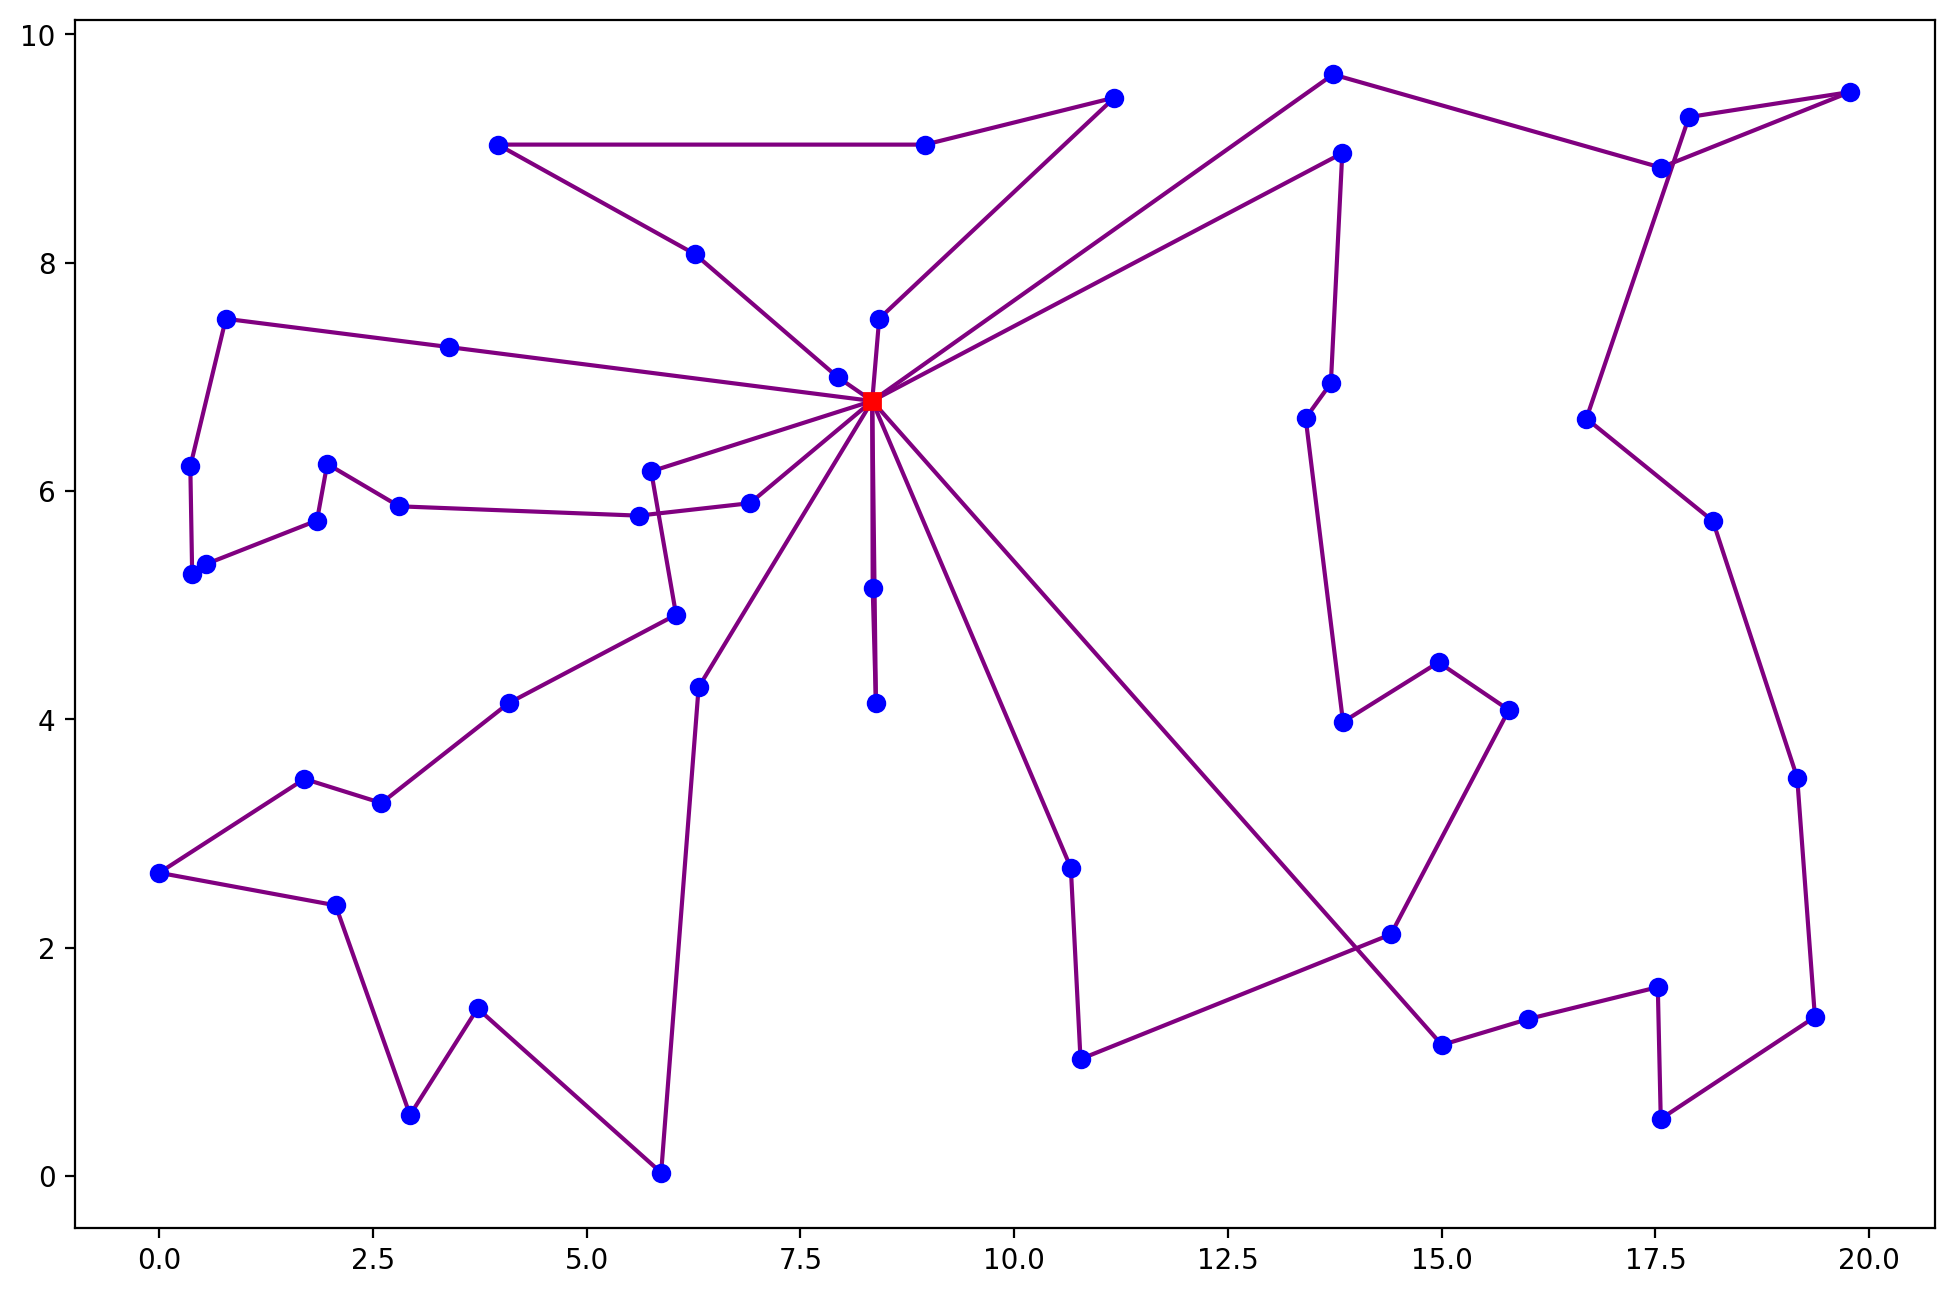

In [16]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200
plt.plot(xc[0], yc[0],c='r',marker='s')
plt.scatter(xc[1:], yc[1:], c='b')
for i, j in auxiliar:
    plt.plot([xc[i],xc[j]],[yc[i],yc[j]],zorder=0, c='purple')